In [1]:
#進行數據分析之前常要引用的函式庫
#matplotlib.pyplot & seaborn: 資料視覺化 用來繪圖、圖表呈現及數據表示
#numpy: 產生陣列數值
#sklearn.decomposition: 降低數據的維度
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [3]:
# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# 資料清理
df.drop(index=[187, 190])
df = df.drop(['DEATH_EVENT'], axis=1)
le = LabelEncoder()
df['anaemia'] = le.fit_transform(df['anaemia'])
df['diabetes'] = le.fit_transform(df['diabetes'])
df['high_blood_pressure'] = le.fit_transform(df['high_blood_pressure'])
df['sex'] = le.fit_transform(df['sex'])
df['smoking'] = le.fit_transform(df['smoking'])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

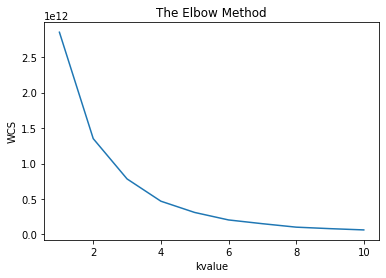

In [6]:
# 算出最適分群數
wcs = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, random_state= 42)
  kmeans.fit(df_pca)
  wcs.append(kmeans.inertia_)

plt.plot(range(1, 11), wcs)
plt.title('The Elbow Method')
plt.xlabel("kvalue")
plt.ylabel("WCS") 
plt.show()

In [7]:
# 將模型分群數調至2
kmeans = KMeans(n_clusters= 4, random_state= 40)

# 建立模型並預測
kms_predict = kmeans.fit_predict(df_pca)

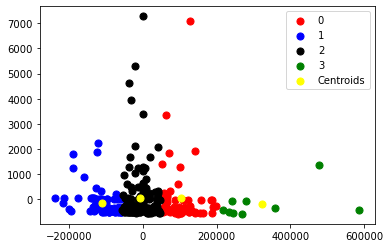

In [8]:
# 印出各群
plt.scatter(df_pca[kms_predict == 0, 0], df_pca[kms_predict == 0, 1], s = 50, c = 'red', label = '0')
plt.scatter(df_pca[kms_predict == 1, 0], df_pca[kms_predict == 1, 1], s = 50, c = 'blue', label = '1')
plt.scatter(df_pca[kms_predict == 2, 0], df_pca[kms_predict == 2, 1], s = 50, c = 'black', label = '2')
plt.scatter(df_pca[kms_predict == 3, 0], df_pca[kms_predict == 3, 1], s = 50, c = 'green', label = '3')

# 印出群心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [9]:
df['DEATH_EVENT'] = kms_predict
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,0


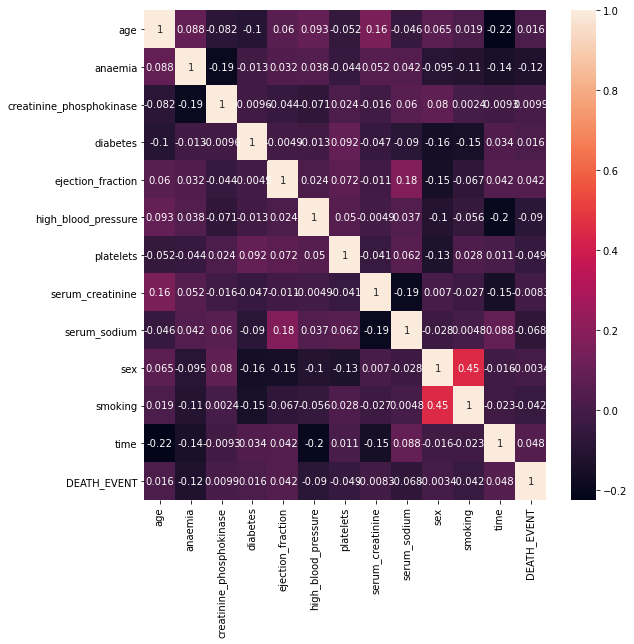

In [10]:
# 相關係數
corr = df.corr()
large = 10; med = 10; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (9, 9),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)

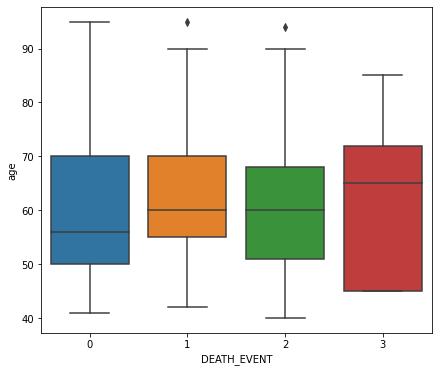

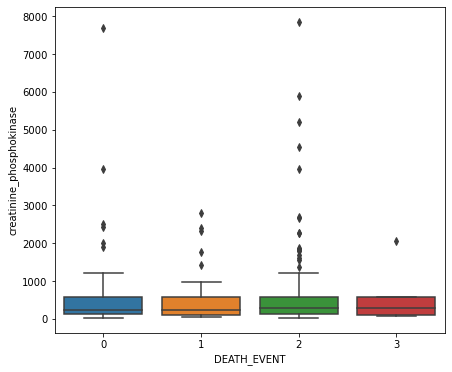

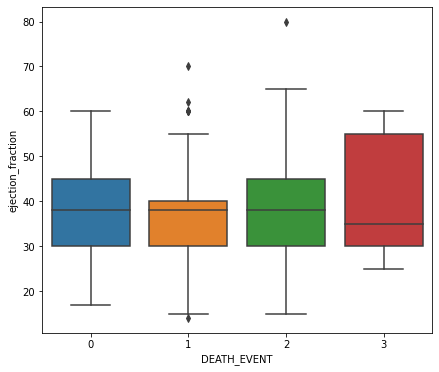

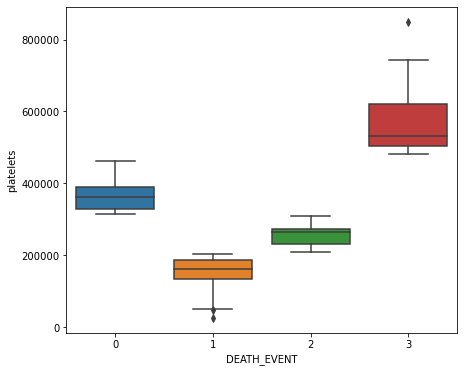

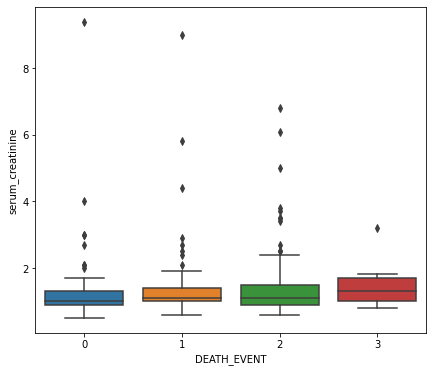

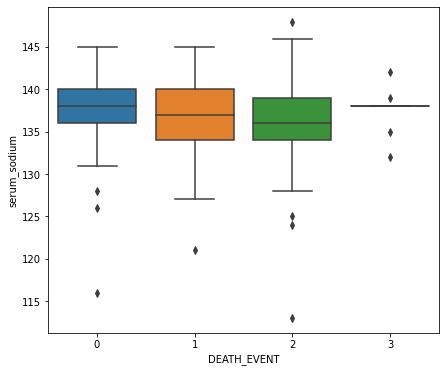

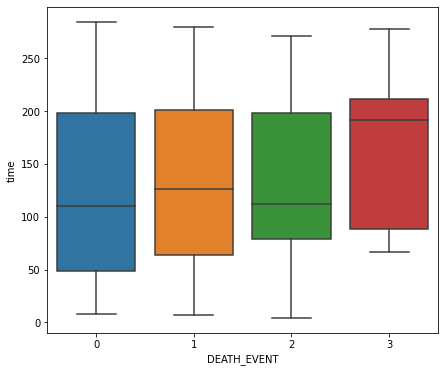

In [11]:
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="age", data=df[['age', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=df[['creatinine_phosphokinase', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df[['ejection_fraction', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="platelets", data=df[['platelets', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df[['serum_creatinine', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="serum_sodium", data=df[['serum_sodium', 'DEATH_EVENT']])

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="time", data=df[['time', 'DEATH_EVENT']])


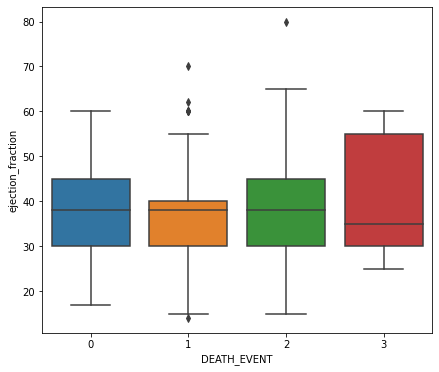

In [12]:
#血液流出百分比

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df[['ejection_fraction', 'DEATH_EVENT']])

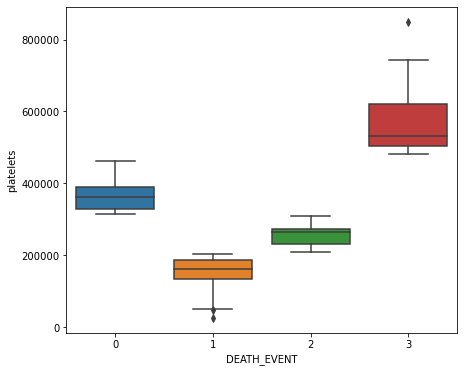

In [13]:
#血小板

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="DEATH_EVENT", y="platelets", data=df[['platelets', 'DEATH_EVENT']])

In [14]:
print(df[(df.DEATH_EVENT == 0) & (df.sex==1) & (df.high_blood_pressure==1)].count()[12])
print(df[(df.DEATH_EVENT == 0) & (df.sex==1) & (df.high_blood_pressure==1)].count())

12
age                         12
anaemia                     12
creatinine_phosphokinase    12
diabetes                    12
ejection_fraction           12
high_blood_pressure         12
platelets                   12
serum_creatinine            12
serum_sodium                12
sex                         12
smoking                     12
time                        12
DEATH_EVENT                 12
dtype: int64


In [15]:
print(df[df.DEATH_EVENT==0].count())
print(df[df.DEATH_EVENT==1].count())
print(df[df.DEATH_EVENT==2].count())
print(df[df.DEATH_EVENT==3].count())

age                         56
anaemia                     56
creatinine_phosphokinase    56
diabetes                    56
ejection_fraction           56
high_blood_pressure         56
platelets                   56
serum_creatinine            56
serum_sodium                56
sex                         56
smoking                     56
time                        56
DEATH_EVENT                 56
dtype: int64
age                         69
anaemia                     69
creatinine_phosphokinase    69
diabetes                    69
ejection_fraction           69
high_blood_pressure         69
platelets                   69
serum_creatinine            69
serum_sodium                69
sex                         69
smoking                     69
time                        69
DEATH_EVENT                 69
dtype: int64
age                         165
anaemia                     165
creatinine_phosphokinase    165
diabetes                    165
ejection_fraction           165
high_blo

Text(0.5, 1.0, 'Boxplots grouped by high_blood_pressure')

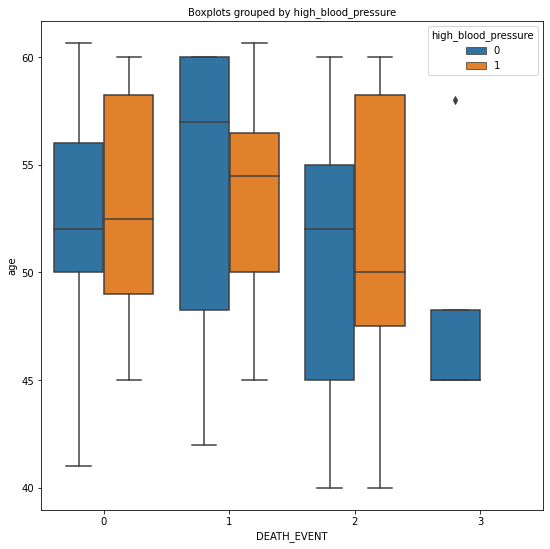

In [16]:
#高血壓
fig,axes = plt.subplots()
sns.boxplot(x='DEATH_EVENT',y='age',hue='high_blood_pressure',
            data=df[df.age < df.age.mean()],orient='v',ax=axes)
# orient引數表示箱形圖的方向

axes.set_title('Boxplots grouped by high_blood_pressure')
#plt.savefig('p5.png')    # 將繪製的圖形儲存為p5.png

Text(0.5, 1.0, 'Boxplots grouped by anaemia')

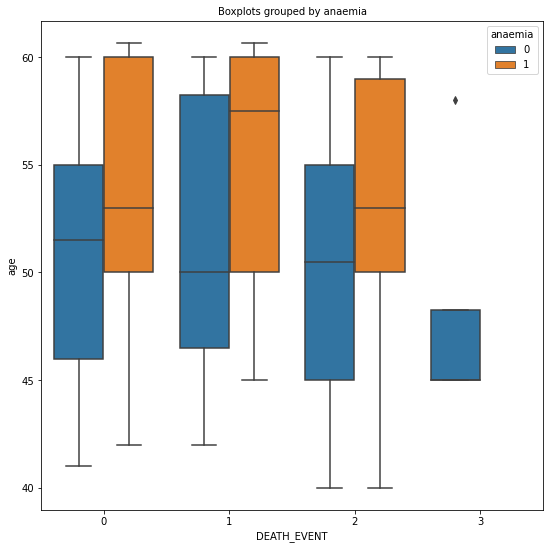

In [17]:
#貧血
fig,axes = plt.subplots()
sns.boxplot(x='DEATH_EVENT',y='age',hue='anaemia',
            data=df[df.age < df.age.mean()],orient='v',ax=axes)
# orient引數表示箱形圖的方向

axes.set_title('Boxplots grouped by anaemia')

Text(0.5, 1.0, 'Boxplots grouped by diabetes')

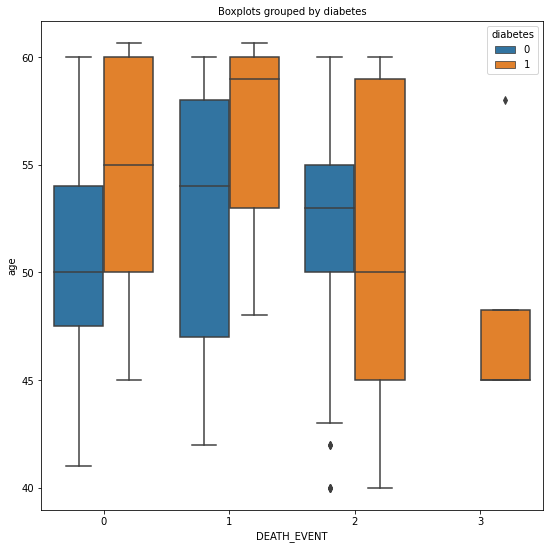

In [18]:
#糖尿病
fig,axes = plt.subplots()
sns.boxplot(x='DEATH_EVENT',y='age',hue='diabetes',
            data=df[df.age < df.age.mean()],orient='v',ax=axes)
# orient引數表示箱形圖的方向

axes.set_title('Boxplots grouped by diabetes')

Text(0.5, 1.0, 'Boxplots grouped by smoking')

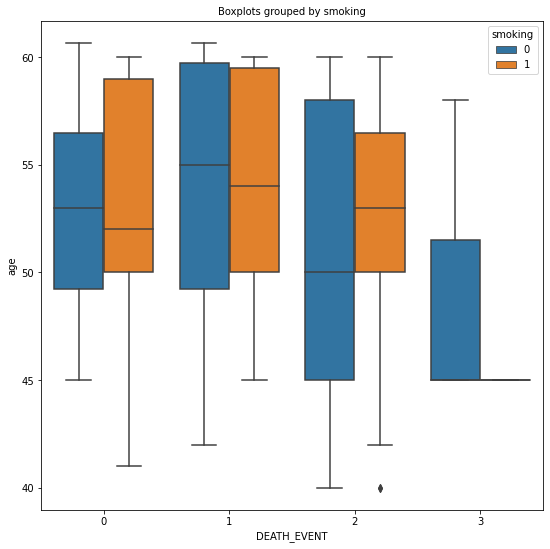

In [19]:
#抽菸
fig,axes = plt.subplots()
sns.boxplot(x='DEATH_EVENT',y='age',hue='smoking',
            data=df[df.age < df.age.mean()],orient='v',ax=axes)
# orient引數表示箱形圖的方向

axes.set_title('Boxplots grouped by smoking')